In [ ]:
def exp_pdf (x, tau) :      
    '''
    the exponential probability density function
    '''
    if tau == 0. : return 1.
    if x < 0. : return 0.   #essendo un esponenziale proteggiamo la funzione da eventuali infiniti
    return exp (-1 * x / tau) / tau

In [ ]:
def loglikelihood (theta, pdf, sample) :
    '''
    the log-likelihood function calculated
    for a sample of independent variables idendically distributed 
    according to their pdf with parameter theta
    '''
    logL = 0.
    for x in sample:
      if (pdf (x, theta) > 0.) : logL = logL + log (pdf (x, theta))    
    return logL

## esercizio 1,  2  e 3
# numeripseudorand distribuiti secondo una distr exp

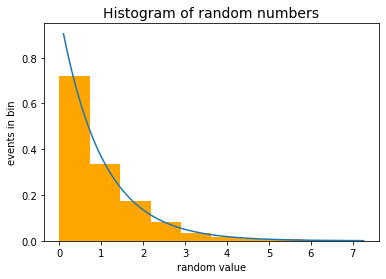

In [155]:
#Write a program that generates pseudo-random numbers distributed according 
#to an exponential function and stores them in a list.

import numpy as np
from myrand import generate_uniform, generate_range
import matplotlib.pyplot as plt

def exp_pdf (x, tau) :      
    '''
    the exponential probability density function
    '''
    if tau == 0. : print("")
    #if x < 0. : return 0.   #essendo un esponenziale proteggiamo la funzione da eventuali infiniti
    return np.exp (-1 * x / tau) / tau #voglio che restituisca un array MODIFICO exp in un Array

def inv_exp (y, tau) :

    return -1 * np.log (1-y) / tau #INVERSA della primitiva della funzione expon

def main():
    
    list1= np.array(generate_range(0.0001,1,1000)) #casto una lista in un numpy array per passarlo a exp_pdf
    #list1= np.array(generate_uniform(1000))
    
    t0=1 #mean

    a=inv_exp(list1,t0) #salvo in una variabile

    
    #ora grafichiamo: (es2)

    # disegno della funzione
    fig, ax = plt.subplots ()
    ax.set_title ('Histogram of random numbers', size=14)
    ax.set_xlabel('random value')
    ax.set_ylabel('events in bin')
    ax.hist (a,      # list of numbers distrubuiti esponenzialmente
             density= True,
             color = 'orange',
        
            )
    #es3: a questo punto plotto la funzione exp_pdf 
    x=np.linspace(0.1,max(a),1000)
    b=exp_pdf(x,t0) #È un plot piatto
    plt.plot(x,b)
    
    plt.show ()


if __name__ == "__main__":
    main ()

## Es 4, 5 , 6

-165.28430302944767


[-21.702558930188108, -80.16599752108857, -117.09541517687364, -144.05507584453608, -165.28430302944767, -182.79304007783685, -197.6913804669867, -210.65697403425713, -222.13385317030955]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


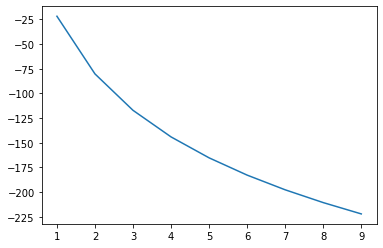

In [172]:
#Write a function likelihood that calculates the likelihood as the parameter t0 varies, 
#for a sample of pseudo-random events generated according to the instructions of Exercise 1.
#How does the result depend on the number of events in the sample?


#Si scriva una funzione loglikelihood che calcoli il logaritmo della verosimiglianza 
#AL VARIARE DEL PARAMETRO t0, per un campione di eventi pseudo-casuali generati secondo le istruzioni 
#dell’Esercizio 1.
#quanto dipendoto i risultati dal numero degli eventi del campione?

import numpy as np
from myrand import generate_uniform, generate_range
import matplotlib.pyplot as plt

def exp_pdf (x, tau) :      
    '''
    the exponential probability density function
    '''
    if tau == 0. : print("")
    #if x < 0. : return 0.   #essendo un esponenziale proteggiamo la funzione da eventuali infiniti
    return np.exp (-1 * x / tau) / tau #voglio che restituisca un array MODIFICO exp in un Array

def loglikelihood (theta, pdf, sample) :
    '''
    the log-likelihood function calculated
    for a sample of independent variables idendically distributed 
    according to their pdf with parameter theta
    '''
    logL = 0.
    for x in sample:
        if (pdf (x, theta) > 0.) : logL = logL + np.log (pdf (x, theta))    
    return logL




def main():
    
    list1= np.array(generate_range(0,1,100)) 
    
    z=inv_exp(list1, 5)
    c=loglikelihood(5, exp_pdf, z)
    print(c) #mi aspetto che essendo una sommatoria resituisca un valore.
    
#es5:
#variamo t0 (che è l'unico parametro teta)
    print("\n")
    listlike=[]
    x=[]
    for t0 in range(1,10):
    
        c=loglikelihood(t0, exp_pdf, z)
        listlike.append(c)
        x.append(t0)
        
    print(listlike)
    print(x)
    plt.plot(x,listlike)
    

if __name__ == "__main__":
    main ()

# es6

-164.61431679144133


[-396.2686457759601, -527.7850810848906, -663.5343272795282, -776.0755794610803, -917.2269668774115, -1026.1225013753576, -1187.6588844125183, -1300.2284778702708, -1416.4340600419575]
[150, 200, 250, 300, 350, 400, 450, 500, 550]


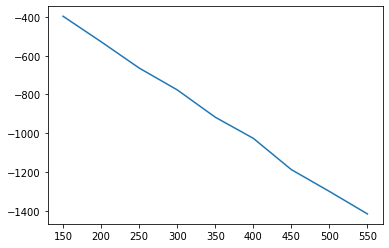

In [180]:
import numpy as np
from myrand import generate_uniform, generate_range
import matplotlib.pyplot as plt

def exp_pdf (x, tau) :      
    '''
    the exponential probability density function
    '''
    if tau == 0. : print("")
    #if x < 0. : return 0.   #essendo un esponenziale proteggiamo la funzione da eventuali infiniti
    return np.exp (-1 * x / tau) / tau #voglio che restituisca un array MODIFICO exp in un Array

def loglikelihood (theta, pdf, sample) :
    '''
    the log-likelihood function calculated
    for a sample of independent variables idendically distributed 
    according to their pdf with parameter theta
    '''
    logL = 0.
    for x in sample:
        if (pdf (x, theta) > 0.) : logL = logL + np.log (pdf (x, theta))    
    return logL




def main():
    
    list1= np.array(generate_range(0,1,100)) 
    
    z=inv_exp(list1, 5)
    c=loglikelihood(5, exp_pdf, z)
    print(c) #mi aspetto che essendo una sommatoria resituisca un valore.
    

        
    
#es6:Study the behavior of 
#the SHAPE (plot-it!) of the log-likelihood as a FUNCTION OF THE NUMBER OF EVENTS COMPRISING THE GENERATED SAMPLE

#ora lasciamo da parte il variare di t0 e consideriamo il variare del numero di eventi per un t0 fissato.
#capiamo quanto varia la funzione likelihood al variare di N numero di eventi in un grafico

    print("\n")
    t0=0.5
    N=100
    
    yL=[]
    xN=[]
    for i in range(1,10):
        N=N+50
        list1= np.array(generate_range(0.1,10,N))
        
        L=loglikelihood(5,exp_pdf, list1) 
        yL.append(L) #array per stampare i valori della likelihood in funzione degli N 
        xN.append(N)
        
    print(yL)
    print(xN)
    plt.plot(xN,yL)# punti likelihood in funzione degli N punti del campione
        
        
if __name__ == "__main__":
    main ()

-164.23046005651491


[]
[550]


ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

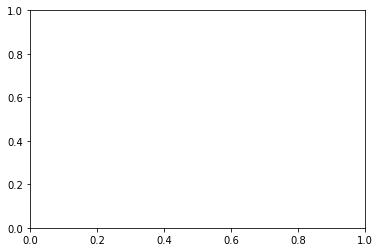

In [183]:
import numpy as np
from myrand import generate_uniform, generate_range
import matplotlib.pyplot as plt

def exp_pdf (x, tau) :      
    '''
    the exponential probability density function
    '''
    if tau == 0. : print("")
    #if x < 0. : return 0.   #essendo un esponenziale proteggiamo la funzione da eventuali infiniti
    return np.exp (-1 * x / tau) / tau #voglio che restituisca un array MODIFICO exp in un Array

def loglikelihood (theta, pdf, sample) :
    '''
    the log-likelihood function calculated
    for a sample of independent variables idendically distributed 
    according to their pdf with parameter theta
    '''
    logL = 0.
    for x in sample:
        if (pdf (x, theta) > 0.) : logL = logL + np.log (pdf (x, theta))    
    return logL




def main():
    
    list1= np.array(generate_range(0,1,100)) 
    
    z=inv_exp(list1, 5)
    c=loglikelihood(5, exp_pdf, z)
    print(c) #mi aspetto che essendo una sommatoria resituisca un valore.
    

        
    
#es6:Study the behavior of 
#the SHAPE (plot-it!) of the log-likelihood as a FUNCTION OF THE NUMBER OF EVENTS COMPRISING THE GENERATED SAMPLE

#ora lasciamo da parte il variare di t0 e consideriamo il variare del numero di eventi per un t0 fissato.
#capiamo quanto varia la funzione likelihood al variare di N numero di eventi in un grafico

    print("\n")
    t0=0.5
    N=100
    
    yL=[]
    xN=[]
    listlike=[]
    for i in range(1,10):
        N=N+50
        list1= np.array(generate_range(0.1,10,N))
        
        for t0 in range(1,5):
            t0=1
            t0=t0+0.5
            c=loglikelihood(t0, exp_pdf, z)
            listlike.append(c)
            
            
    
    xN.append(N)
        
    print(yL)
    print(xN)
    plt.plot(xN,yL,listlike)# punti likelihood in funzione degli N punti del campione
        
        
if __name__ == "__main__":
    main ()